<a href="https://colab.research.google.com/github/mprksa/kubus5/blob/main/KNN_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import os
import numpy as np
import json
import pandas as pd
import cv2
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
!git clone https://github.com/mprksa/Blocks2.git

Cloning into 'Blocks2'...
remote: Enumerating objects: 884, done.
remote: Counting objects: 100% (884/884), done.
remote: Compressing objects: 100% (870/870), done.
remote: Total 884 (delta 35), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (884/884), 1.82 GiB | 24.47 MiB/s, done.
Resolving deltas: 100% (35/35), done.
Updating files: 100% (728/728), done.


In [ ]:
# Path to the CSV files
train_csv_path = 'Blocks2/train/train.csv'
test_csv_path = 'Blocks2/test/test.csv'
validation_csv_path = 'Blocks2/validation/validation.csv'

In [ ]:
# Load CSV data
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)
validation_data = pd.read_csv(validation_csv_path)

In [ ]:
# Fungsi untuk konversi gambar dari RGB ke HSV dan menghitung mean untuk setiap channel
def rgb_to_hsv_features(image_array):
    hsv_img = cv2.cvtColor(image_array, cv2.COLOR_RGB2HSV)
    mean_h = np.mean(hsv_img[:, :, 0])
    mean_s = np.mean(hsv_img[:, :, 1])
    mean_v = np.mean(hsv_img[:, :, 2])
    return np.array([mean_h, mean_s, mean_v])

def load_labels_from_csv(csv_path):
    labels_dict = {}
    try:
        labels_df = pd.read_csv(csv_path)
        labels_df['image'] = labels_df['image'].apply(lambda x: os.path.basename(x))

        # Parse JSON string in 'label' column
        def extract_label(json_str):
            try:
                data = json.loads(json_str)
                if isinstance(data, list) and len(data) > 0:
                    return data[0]['rectanglelabels'][0]  # Assuming only one label per image
                else:
                    return None
            except Exception as e:
                print(f"Error parsing JSON: {e}")
                return None

        labels_df['label'] = labels_df['label'].apply(extract_label)

        # Convert to dictionary
        labels_dict = pd.Series(labels_df['label'].values, index=labels_df['image']).to_dict()

    except Exception as e:
        print(f"Error loading labels from CSV: {e}")

    return labels_dict


# Fungsi untuk mengambil fitur HSV dan label dari gambar berdasarkan CSV
def rgb_to_hsv_features_with_label_from_csv(images_folder_path, csv_path):
    hsv_features = []
    labels = []
    labels_dict = load_labels_from_csv(csv_path)
    image_extensions = ['*.jpg', '*.JPG', '*.jpeg', '*.png']
    images_files = []
    for ext in image_extensions:
        images_files.extend(glob(os.path.join(images_folder_path, ext)))

    for img_path in images_files:
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image {img_path}")
            continue

        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        mean_h = np.mean(hsv_img[:, :, 0])
        mean_s = np.mean(hsv_img[:, :, 1])
        mean_v = np.mean(hsv_img[:, :, 2])
        file_name = os.path.basename(img_path)

        if file_name in labels_dict:
            hsv_features.append([mean_h, mean_s, mean_v])
            labels.append(labels_dict[file_name])
        else:
            print(f"Label for image {file_name} not found in CSV file")

    return np.array(hsv_features), np.array(labels)


In [ ]:
# Path ke CSV dan folder gambar
train_csv_path = 'Blocks2/train/train.csv'
train_image_folder_path = 'Blocks2/train/images'

In [ ]:
# Ekstraksi fitur dan label
hsv_features, labels = rgb_to_hsv_features_with_label_from_csv(train_image_folder_path, train_csv_path)

print(f"Number of features extracted: {len(hsv_features)}")
print(f"Number of labels extracted: {len(labels)}")

Error loading labels from CSV: expected str, bytes or os.PathLike object, not float
Label for image 3cd7a2ea-IMG_9312.jpg not found in CSV file
Label for image 60cbd474-IMG_9210.jpg not found in CSV file
Label for image 86d694f8-IMG_9513.jpg not found in CSV file
Label for image fdc82cec-IMG_9630.jpg not found in CSV file
Label for image 1a4e0109-IMG_9405.jpg not found in CSV file
Label for image e3408ec2-IMG_9404.jpg not found in CSV file
Label for image ef90cb57-IMG_9265.jpg not found in CSV file
Label for image 59c0927f-IMG_9397.jpg not found in CSV file
Label for image 88fbcd18-IMG_9495.jpg not found in CSV file
Label for image 3eec66ce-IMG_9421.jpg not found in CSV file
Label for image 27e0eae3-IMG_9491.jpg not found in CSV file
Label for image e456d40c-IMG_9391.jpg not found in CSV file
Label for image d62046d4-IMG_9468.jpg not found in CSV file
Label for image 0a7d23d9-IMG_9385.jpg not found in CSV file
Label for image 81530d7c-IMG_9342.jpg not found in CSV file
Label for image 

KeyboardInterrupt: 

In [ ]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(hsv_features, labels, test_size=0.2, random_state=42)

In [ ]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict and calculate accuracy
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 34.65%


In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        biru       0.44      0.65      0.52        17
       hitam       0.41      0.43      0.42        21
      kuning       0.37      0.26      0.30        27
       merah       0.28      0.29      0.29        17
       putih       0.18      0.16      0.17        19

    accuracy                           0.35       101
   macro avg       0.33      0.36      0.34       101
weighted avg       0.34      0.35      0.34       101



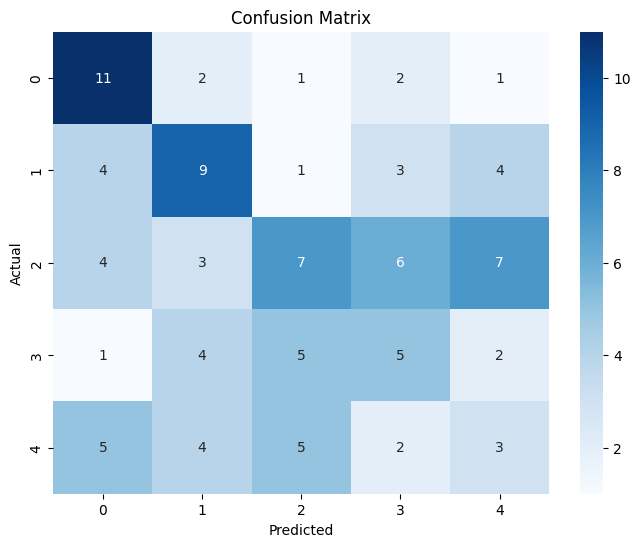

In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Validate using validation.csv
validation_labels_path = validation_csv_path
validation_labels_dict = load_labels_from_csv(validation_labels_path)  # Menggunakan fungsi load_labels_from_csv yang sudah diperbarui

hsv_features_validation = []
labels_validation = []

for index, row in validation_data.iterrows():
    img_path = os.path.join(validation_image_folder_path, row['image'])
    if os.path.exists(img_path):
        resize_image = load_images(img_path, size=(224, 224))
        rgb_hsv = rgb_to_hsv_features(resize_image)
        hsv_features_validation.append(rgb_hsv)
        labels_validation.append(validation_labels_dict.get(row['image'], 'unknown'))  # Menggunakan get() untuk mendapatkan label dengan key 'image_id'
    else:
        print(f"Warning: Image not found: {img_path}")  # Add this line to check if images are being found

hsv_features_validation = np.array(hsv_features_validation)
labels_validation = np.array(labels_validation)


In [ ]:
# Check if any features were extracted
if hsv_features_validation.size == 0:
    print("Error: No features were extracted for the validation set. Check your data loading and feature extraction process.")
else:
    # Reshape the features to a 2D array if necessary
    if hsv_features_validation.ndim == 1:
        hsv_features_validation = hsv_features_validation.reshape(-1, 1)  # Reshape if it's a 1D array

    # Predict with the trained model on validation dataset
    y_validation_pred = knn.predict(hsv_features_validation)
    accuracy_validation = accuracy_score(labels_validation, y_validation_pred)
    print(f'Validation Accuracy: {accuracy_validation * 100:.2f}%')

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Print validation classification report
print(classification_report(labels_validation, y_validation_pred))

In [ ]:
# Display confusion matrix for validation data
conf_matrix_validation = confusion_matrix(labels_validation, y_validation_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_validation, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Validation Data')
plt.show()

In [ ]:
# Test on images from test.csv
test_labels_path = test_csv_path
test_labels_dict = load_labels(test_labels_path)

hsv_features_test = []
labels_test = []

for index, row in test_data.iterrows():
    img_path = os.path.join(test_image_folder_path, row['image_id'])
    if os.path.exists(img_path):
        resize_image = load_images(img_path, size=(224, 224))
        rgb_hsv = rgb_to_hsv_features(resize_image)
        hsv_features_test.append(rgb_hsv)
        labels_test.append(test_labels_dict[row['image_id']])

hsv_features_test = np.array(hsv_features_test)
labels_test = np.array(labels_test)

In [ ]:
# Predict with the trained model on test dataset
y_test_pred = knn.predict(hsv_features_test)
accuracy_test = accuracy_score(labels_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')

In [ ]:
# Print test classification report
print(classification_report(labels_test, y_test_pred))

In [ ]:
# Display confusion matrix for test data
conf_matrix_test = confusion_matrix(labels_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Data')
plt.show()